# Dataset Demo == TensorFlow 2.0

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = ''
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Create sample data in numpy

In [3]:
x_np = np.linspace(0, 40, 41)
y_np = x_np*x_np

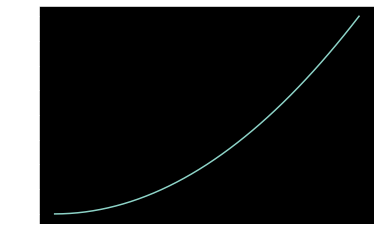

In [4]:
plt.plot(x_np, y_np)

## Create dataset from numpy data

In [7]:
x_tensor = tf.convert_to_tensor(x_np)
y_tensor = tf.convert_to_tensor(y_np)
dataset = tf.data.Dataset.from_tensor_slices(tensors=(x_tensor, y_tensor))
print(dataset)

<TensorSliceDataset shapes: ((), ()), types: (tf.float64, tf.float64)>


In [6]:
dataset = dataset.shuffle(10)
print(dataset)

<ShuffleDataset shapes: ((), ()), types: (tf.float64, tf.float64)>


In [8]:
# repeat, shuffle, batch
dataset = dataset.batch(batch_size=4)
dataset = dataset.repeat(5)

In [11]:
# map batch to sum, with def fn.
def sum_y(x, y):
    return x, tf.reduce_sum(y)
# map
dataset = dataset.map(map_func=sum_y)

In [16]:
it = iter(dataset)

In [17]:
for n in range(44):
    next_elem = next(it)
    x_o = next_elem[0].numpy()
    y_o = next_elem[1].numpy()
    print("Run {}: x={}, y={}".format(n, x_o, y_o))

Run 0: x=[ 2.  5.  8. 12.], y=237.0
Run 1: x=[13.  4.  9.  6.], y=302.0
Run 2: x=[ 0.  1.  3. 17.], y=299.0
Run 3: x=[16. 20. 18. 23.], y=1509.0
Run 4: x=[14. 19. 11.  7.], y=727.0
Run 5: x=[26. 25. 24. 30.], y=2777.0
Run 6: x=[28. 10. 22. 27.], y=2097.0
Run 7: x=[37. 32. 35. 39.], y=5139.0
Run 8: x=[36. 33. 40. 38.], y=5429.0
Run 9: x=[34. 21. 15. 29.], y=2663.0
Run 10: x=[31.], y=961.0
Run 11: x=[ 9. 10.  7.  4.], y=246.0
Run 12: x=[ 8. 11.  5.  1.], y=211.0
Run 13: x=[12. 18. 15.  2.], y=697.0
Run 14: x=[16. 19. 22.  3.], y=1110.0
Run 15: x=[24. 14.  6. 25.], y=1433.0
Run 16: x=[13.  0. 28. 21.], y=1394.0
Run 17: x=[27. 34. 30. 31.], y=3746.0
Run 18: x=[37. 29. 33. 32.], y=4323.0
Run 19: x=[36. 17. 26. 35.], y=3486.0
Run 20: x=[23. 20. 38. 39.], y=3894.0
Run 21: x=[40.], y=1600.0
Run 22: x=[4. 5. 9. 1.], y=123.0
Run 23: x=[10. 14. 13.  8.], y=529.0
Run 24: x=[12.  7. 11.  2.], y=318.0
Run 25: x=[ 6. 16.  0. 20.], y=692.0
Run 26: x=[17. 19. 26. 28.], y=2110.0
Run 27: x=[18. 29. 31. 2

# DS images (1)

In [18]:
import glob

In [19]:
img_filenames = glob.glob('../Assignment 1/test_images/*.JPEG')

In [20]:
def read_image(fname):
    image = tf.io.read_file(fname)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(images=image, size=(224, 224)) # do not resize first, then error with batch, explain...
    image = tf.cast(image, dtype=tf.uint8) # add together with resize_images
    # do preprocessing etc.
    return image

In [21]:
dataset = tf.data.Dataset.from_tensor_slices((tf.convert_to_tensor(img_filenames)))
dataset = dataset.map(map_func=read_image)
dataset = dataset.batch(3)  # do not use at first

In [22]:
it = iter(dataset)
res = next(it).numpy()

In [23]:
print("Dataset tensor shape: {}".format(res.shape))

Dataset tensor shape: (3, 224, 224, 3)


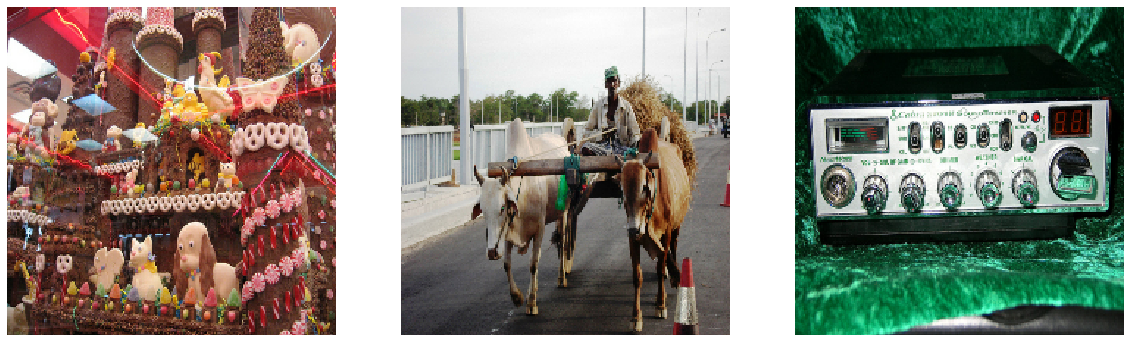

In [24]:
fig = plt.figure(figsize=(20,10))
for idx in range(3):
    splt = fig.add_subplot(1,3, idx+1)
    splt.imshow(res[idx])
    splt.axis('off')

fig.show()

## DS Images (2)

In [25]:
dataset_path = '/data/ssd_data/Datasets/imagenet2012_val/validation/'

In [10]:
labels_file = os.path.join('dsdsdsds/dsdsd/dsdsd/', 'val_labels.txt')
print(labels_file)

dsdsdsds/dsdsd/dsdsd/val_labels.txt


In [31]:
!head -n10 $labels_file

n01440764/ILSVRC2012_val_00000293.JPEG,0
n01440764/ILSVRC2012_val_00002138.JPEG,0
n01440764/ILSVRC2012_val_00003014.JPEG,0
n01440764/ILSVRC2012_val_00006697.JPEG,0
n01440764/ILSVRC2012_val_00007197.JPEG,0
n01440764/ILSVRC2012_val_00009111.JPEG,0
n01440764/ILSVRC2012_val_00009191.JPEG,0
n01440764/ILSVRC2012_val_00009346.JPEG,0
n01440764/ILSVRC2012_val_00009379.JPEG,0
n01440764/ILSVRC2012_val_00009396.JPEG,0


In [32]:
def read_line(line):
    res = tf.io.decode_csv(line, record_defaults=[[""], [0]], field_delim=',')
    abs_path = tf.strings.join([tf.constant(dataset_path), res[0]])
    img = read_image(abs_path)
    return img, res[1]

In [33]:
# TextLine dataset is different kind of dataset
dataset = tf.data.TextLineDataset([labels_file])
dataset = dataset.shuffle(50000) # shuffle before map. way faster...
dataset = dataset.map(map_func=read_line)
dataset = dataset.batch(32)

In [34]:
it = iter(dataset)

In [35]:
img, label = next(it)
img = img.numpy()
label = label.numpy()

In [36]:
print("img shape: {}, labels: {}".format(img.shape, label))

img shape: (32, 224, 224, 3), labels: [509 895  19 153  18 108 923 779 590 691 676  47 782 677 259 424 547 599
 289 843 504 393 167 978 605 214  88 319 699 976 189 872]


In [37]:
from util import read_mapping
mapping = read_mapping('../Assignment 1/labels.txt')

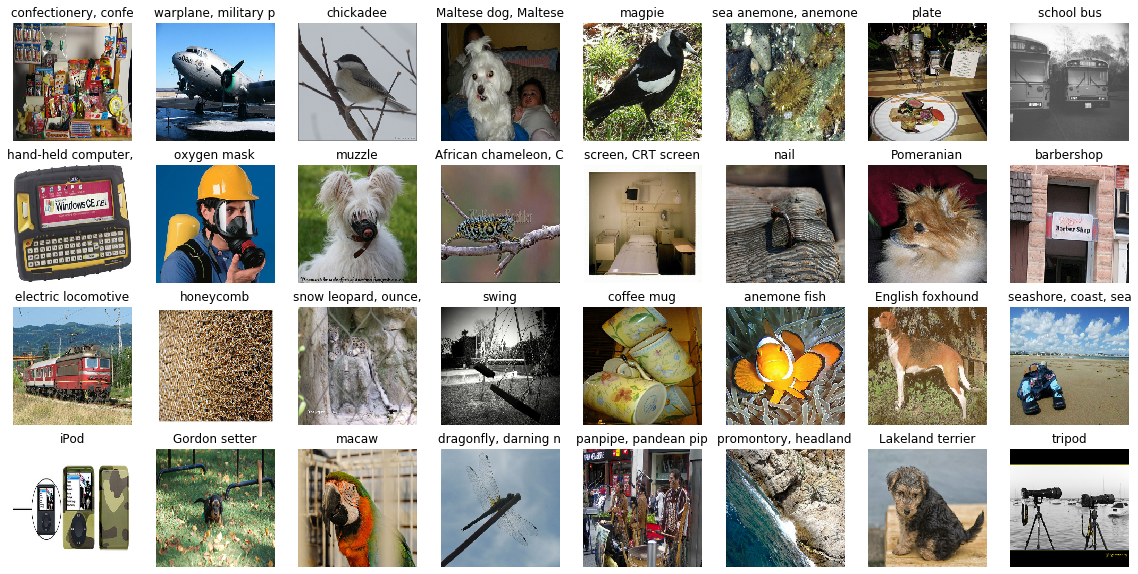

In [38]:
fig = plt.figure(figsize=(20,10))
for idx in range(32):
    splt = fig.add_subplot(4, 8, idx+1)
    splt.imshow(img[idx])
    splt.axis('off')
    splt.set_title("{}".format(mapping[label[idx]+1][:20]))

fig.show()